In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
customer = pd.read_csv('Mall_Customers.csv')

In [6]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
customer = customer[['Annual Income (k$)', 'Spending Score (1-100)']]

In [12]:
wcss =[]
r = range(1, 11)

for i in r:
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(customer)
    wcss.append(km.inertia_)

Text(0, 0.5, 'wcss')

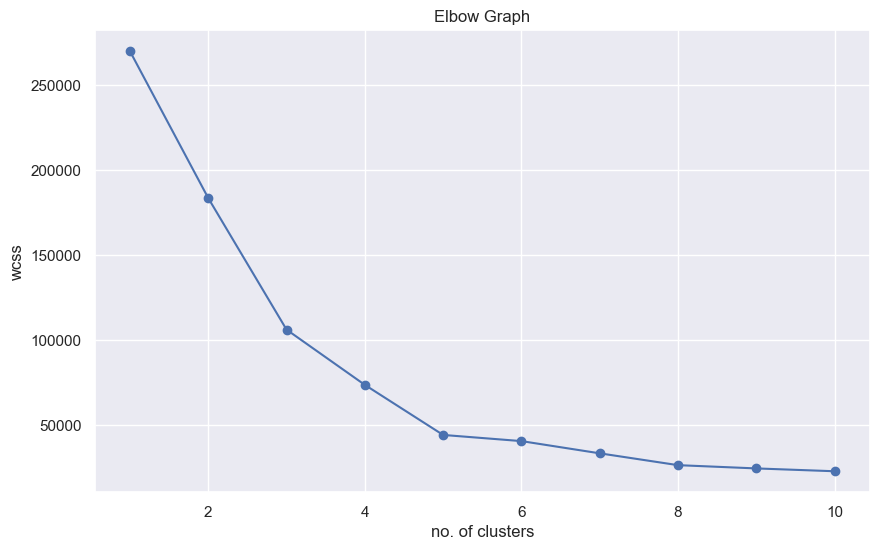

In [14]:
sns.set()
plt.figure(figsize=(10,6))
plt.plot(r, wcss, marker ='o')
plt.title('Elbow Graph')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')

In [15]:
km = KMeans(n_clusters=5, init='k-means++', random_state=42)
y = km.fit_predict(customer)

In [17]:
customer['cluster'] = y

C:\Users\user\AppData\Local\Temp\ipykernel_4824\3421482179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['cluster'] = y


In [19]:
clust_prof = customer.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

In [20]:
clust_prof

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [22]:
cluster_labels = {
    0: 'Average Customers',
    1: 'High Income - High Spending',
    2: 'Low Income - High Spending',
    3: 'High Income - Low Spending',
    4: 'Low Income - Low Spending'
} 

In [23]:
customer['Segment'] = customer['cluster'].map(cluster_labels)

C:\Users\user\AppData\Local\Temp\ipykernel_4824\4160048314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['Segment'] = customer['cluster'].map(cluster_labels)


In [24]:
customer.head()

,Annual Income (k$),Spending Score (1-100),cluster,Segment
0,15,39,4,Low Income - Low Spending
1,15,81,2,Low Income - High Spending
2,16,6,4,Low Income - Low Spending
3,16,77,2,Low Income - High Spending
4,17,40,4,Low Income - Low Spending


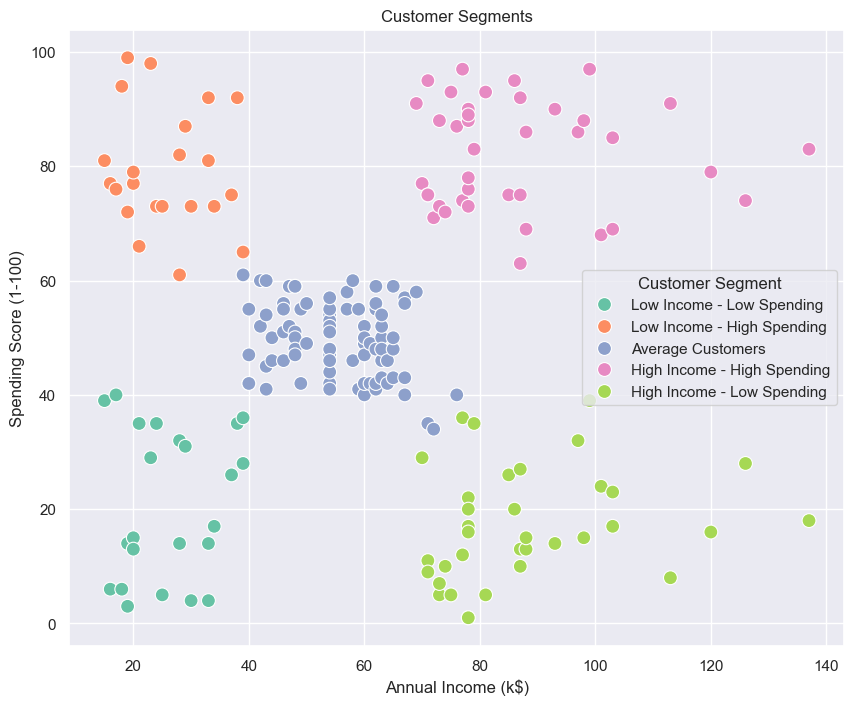

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=customer,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Segment',
    palette='Set2',
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Customer Segment')
plt.show()